# §1. Load Dependencies

In [79]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# §2. Building a Graph from Data

In [80]:
# Run web scraper on imdb site to get voice actor - anime relations
# Data = List of directed edges
url = "web_scraper/results.csv"
df = pd.read_csv(url)
df.head()

,actor,movie_or_TV_name
0,Maile Flanagan,My Babysitter the Super Hero
1,Maile Flanagan,Work Wife
2,Maile Flanagan,The Loud House
3,Maile Flanagan,Barbie & Kendra Save the Tiger King
4,Maile Flanagan,Boruto: Naruto Next Generations


In [81]:
df.shape

(63145, 2)

In [82]:
# Number of unique voice actors
len(df.actor.unique())

511

In [83]:
# Let's visualize 100 random relations
DG = nx.from_pandas_edgelist(df.sample(n=250), 
                             source = "actor", 
                             target = "movie_or_TV_name", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

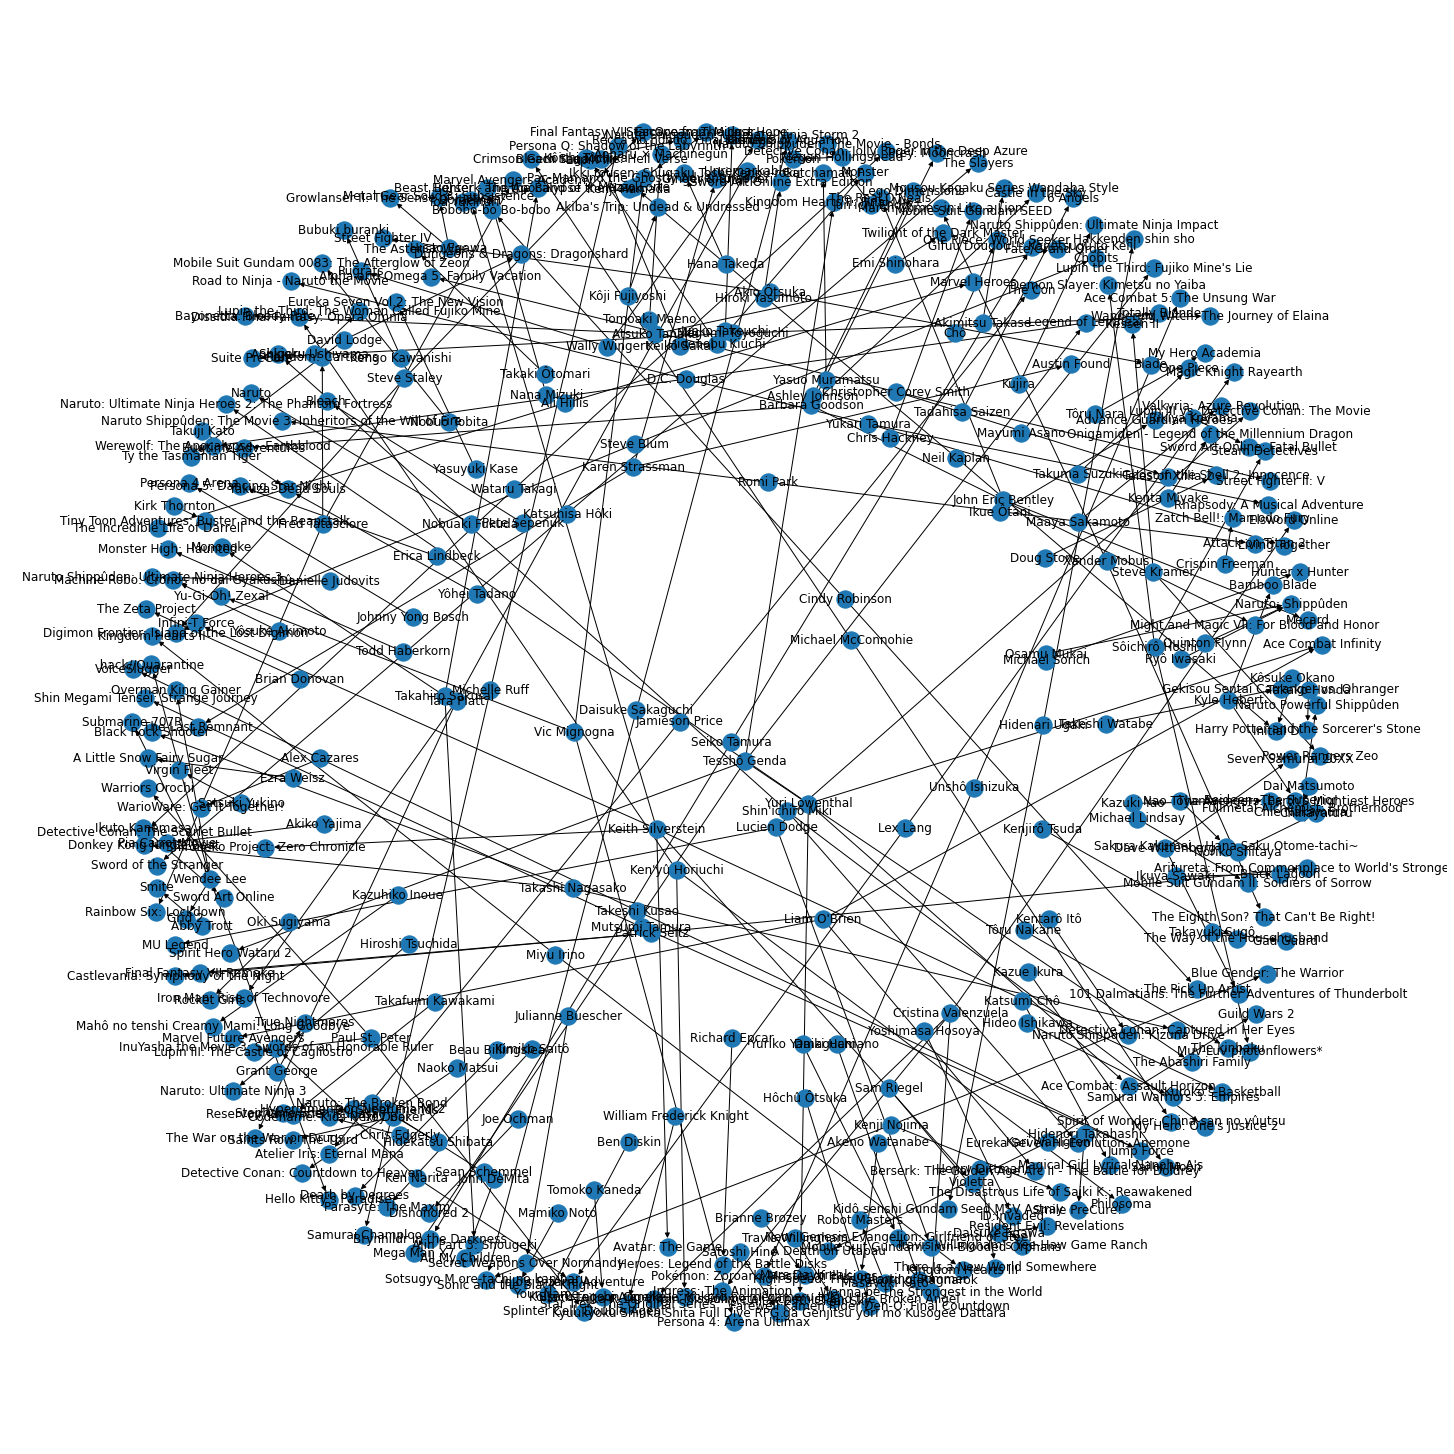

In [84]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(DG, k=0.15)
nx.draw(DG, pos, with_labels = True)

# §3. Exploratory Analysis

In [85]:
# Adjacency matrix
A = nx.convert_matrix.to_numpy_matrix(DG)

In [86]:
A.shape

(402, 402)

In [87]:
A

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
eigs = np.linalg.eig(A)
ix = np.argsort(eigs[0])

eig_centrality = eigs[1][ix][:,0]

# need to convert to real, by default eigs are complex
# A is symmetric, so the imaginary parts are always 0
eig_centrality = np.real(eig_centrality)